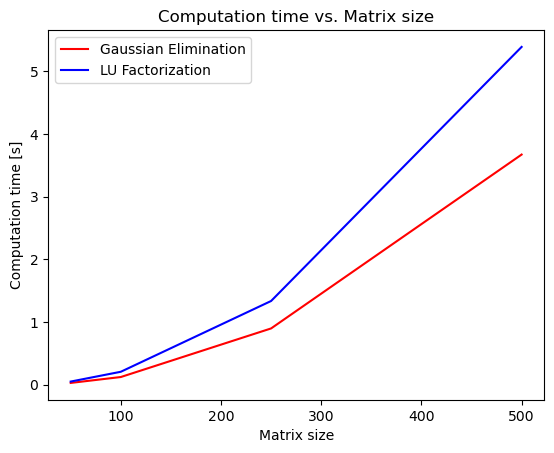

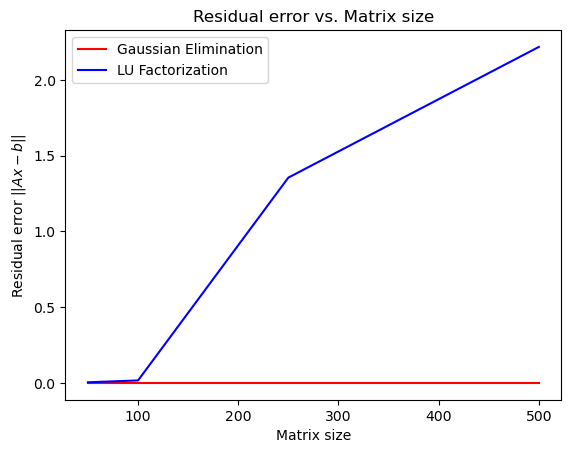

[0.02524495 0.11931229 0.89500284 3.67012787]
[0.0469172  0.20325875 1.33299637 5.38831472]
[1.37469397e-11 3.35611393e-11 1.90907838e-09 2.58175545e-09]
[0.00419388 0.01641338 1.35494902 2.21736466]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import time

#initialize matrixes
def matrix_init(n, test):
    #dimensions of matrices n
    if test == 1: #matrix from PS 2.3
        n = 3
        A = np.array([[2, 4, 5], [7, 6, 5], [9, 11, 3]], dtype=np.float32)
        b = np.array([[3], [2], [1]], dtype=np.float32)
    if test == 2: #A = 5 * sqrt(n) * I + R
        A = 5 * np.sqrt(n) * np.eye(n) + np.random.normal(size = (n, n))
        b = np.random.normal(size = (n, 1))
    if test == 3:
        A = np.random.normal(size = (n, n))
        b = np.random.normal(size = (n, 1))
    return A, b

#gaussian elimination without pivoting
def Gaussian_Elim(A, b): #based on algorithm 6.1
    #coefficient of unknowns matrix A, constants matrix b
    for i in range(n - 1):
        for j in range(i + 1, n):
          m = A[j][i]/A[i][i]
          A[j] = A[j] - m * A[i]
          b[j] = b[j] - m * b[i]
    if A[n-1][n-1] == 0:
        print("no unique solution exists")
    return A, b

#back substitution of upper triangular matrix
def Backsolve(A, b): #based on algorithm 6.1
    #coefficient of unknowns matrix A, constants matrix b
    x = np.zeros((n,1))
    for i in range(n - 1, -1, -1):
        x_i = b[i]
        for j in range(i + 1, n):
            x_i = x_i - A[i][j] * x[j]
        x[i] = x_i/A[i][i]
    return x

#compute LU factorization of matrix
def LU_factorize(A): #based on algorithm 6.4
    #coefficient of unknowns matrix A
    L = np.eye(n, dtype=np.float32) #set L_ii to 1 (identity matrix)
    U = np.zeros((n, n), dtype=np.float32) #initialize U
    for i in range(n):
        for j in range(i, n):
            u_ij = A[i][j] - np.dot(L[i,:], U[:,j])
            l_ji = A[j][i] - np.dot(L[j,:], U[:,i])
            U[i][j] = u_ij
            L[j][i] = l_ji/U[i][i]
    return L, U

#front substitution of lower triangular matrix
def LU_solve(L, U, b): #based on algorithm 6.1
    #lower triangular matrix L, upper triangular matrix U, constants matrix b
    y = np.zeros((n, 1))
    for i in range(n): #front solve Ly = b for y
        y_i = b[i]
        for j in range(i):
            y_i = y_i - L[i][j] * y[j]
        y[i] = y_i/L[i][i]
    return Backsolve(U, y) #back solve Ux = y for x

test = 3

if test == 1:
    n = 3
    A, b = matrix_init(n, test)

    A_copy = A.copy() #gaussian modifies passed array, create shallow copy
    b_copy = b.copy()

    t0_gauss = time.time_ns()
    A_gauss, b_gauss = Gaussian_Elim(A_copy, b_copy)
    x_gauss = Backsolve(A_gauss, b_gauss)
    t1_gauss = time.time_ns()
    time_gauss = t1_gauss - t0_gauss

    t0_LU = time.time_ns()
    L, U = LU_factorize(A)
    x_LU = LU_solve(L, U, b)
    t1_LU = time.time_ns()
    time_LU = t1_LU - t0_LU
    
    print(A_gauss)
    print(b_gauss)
    print(L)
    print(U)
    print(x_gauss)
    print(x_LU)
    print(time_gauss)
    print(np.linalg.norm(np.matmul(A, x_gauss) - b))
    print(time_LU)
    print(np.linalg.norm(np.matmul(A, x_LU) - b))
if test == 2:
    n_test = np.array([50, 100, 250, 500]) #test sizes of matrices
    time_gauss = np.array([]) #computation time for gaussian elimination
    time_LU = np.array([]) #computation time for LU factorization
    res_err_gauss = np.array([]) #residual error for gaussian elimination
    res_err_LU = np.array([]) #residual error for LU factorization
    for n in n_test:
        A, b = matrix_init(n, test)

        A_copy = A.copy() #gaussian modifies passed array, create shallow copy
        b_copy = b.copy()

        t0_gauss = time.time()
        A_gauss, b_gauss = Gaussian_Elim(A_copy, b_copy)
        x_gauss = Backsolve(A_gauss, b_gauss)
        t1_gauss = time.time()
        time_gauss = np.append(time_gauss, t1_gauss - t0_gauss)
        res_err_gauss = np.append(res_err_gauss, np.linalg.norm(np.matmul(A, x_gauss) - b))

        t0_LU = time.time()
        L, U = LU_factorize(A)
        x_LU = LU_solve(L, U, b)
        t1_LU = time.time()
        time_LU = np.append(time_LU, t1_LU - t0_LU)
        res_err_LU = np.append(res_err_LU, np.linalg.norm(np.matmul(A, x_LU) - b))

    plt.plot(n_test, time_gauss, "r-", label="Gaussian Elimination")
    plt.plot(n_test, time_LU, "b-", label="LU Factorization")
    plt.xlabel("Matrix size")
    plt.ylabel("Computation time [s]")
    plt.title("Computation time vs. Matrix size")
    plt.legend()
    plt.show()

    plt.plot(n_test, res_err_gauss, "r-", label="Gaussian Elimination")
    plt.plot(n_test, res_err_LU, "b-", label="LU Factorization")
    plt.xlabel("Matrix size")
    plt.ylabel("Residual error $||Ax - b||$")
    plt.title("Residual error vs. Matrix size")
    plt.legend()
    plt.show()
    print(time_gauss)
    print(time_LU)
    print(res_err_gauss)
    print(res_err_LU)
if test == 3:
    n_test = np.array([50, 100, 250, 500]) #test sizes of matrices
    time_gauss = np.array([]) #computation time for gaussian elimination
    time_LU = np.array([]) #computation time for LU factorization
    res_err_gauss = np.array([]) #residual error for gaussian elimination
    res_err_LU = np.array([]) #residual error for LU factorization
    for n in n_test:
        A, b = matrix_init(n, test)

        A_copy = A.copy() #gaussian modifies passed array, create shallow copy
        b_copy = b.copy()

        t0_gauss = time.time()
        A_gauss, b_gauss = Gaussian_Elim(A_copy, b_copy)
        x_gauss = Backsolve(A_gauss, b_gauss)
        t1_gauss = time.time()
        time_gauss = np.append(time_gauss, t1_gauss - t0_gauss)
        res_err_gauss = np.append(res_err_gauss, np.linalg.norm(np.matmul(A, x_gauss) - b))

        t0_LU = time.time()
        L, U = LU_factorize(A)
        x_LU = LU_solve(L, U, b)
        t1_LU = time.time()
        time_LU = np.append(time_LU, t1_LU - t0_LU)
        res_err_LU = np.append(res_err_LU, np.linalg.norm(np.matmul(A, x_LU) - b))

    plt.plot(n_test, time_gauss, "r-", label="Gaussian Elimination")
    plt.plot(n_test, time_LU, "b-", label="LU Factorization")
    plt.xlabel("Matrix size")
    plt.ylabel("Computation time [s]")
    plt.title("Computation time vs. Matrix size")
    plt.legend()
    plt.show()

    plt.plot(n_test, res_err_gauss, "r-", label="Gaussian Elimination")
    plt.plot(n_test, res_err_LU, "b-", label="LU Factorization")
    plt.xlabel("Matrix size")
    plt.ylabel("Residual error $||Ax - b||$")
    plt.title("Residual error vs. Matrix size")
    plt.legend()
    plt.show()
    print(time_gauss)
    print(time_LU)
    print(res_err_gauss)
    print(res_err_LU)